## RECUPERACIÓN LAB02

**GRUPO:** B06

**INTEGRANTES:**   
  - Juan Rivera

  - Santiago Bescós 
                
  - Carlos Adaro
                
  - Pedro

### PRÁCTICA 1 (REGLAS DE ASOCIACIÓN)

Importamos las librerías necesarias y cargamos el archivo

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules
import networkx as nx
import matplotlib.pyplot as plt

datos=pd.read_csv('Market_Basket_Optimisation.csv')
datos.head(10)

shrimp       almonds     avocado    vegetables mix green grapes  \
0            burgers     meatballs        eggs               NaN          NaN   
1            chutney           NaN         NaN               NaN          NaN   
2             turkey       avocado         NaN               NaN          NaN   
3      mineral water          milk  energy bar  whole wheat rice    green tea   
4     low fat yogurt           NaN         NaN               NaN          NaN   
5  whole wheat pasta  french fries         NaN               NaN          NaN   
6               soup   light cream     shallot               NaN          NaN   
7  frozen vegetables     spaghetti   green tea               NaN          NaN   
8       french fries           NaN         NaN               NaN          NaN   
9               eggs      pet food         NaN               NaN          NaN   

  whole weat flour yams cottage cheese energy drink tomato juice  \
0              NaN  NaN            NaN          NaN          NaN   
1              NaN  NaN            NaN          NaN          NaN   
2              NaN  NaN            NaN          NaN          NaN   
3              NaN  NaN            NaN          NaN          NaN   
4              NaN  NaN            NaN          NaN          NaN   
5              NaN  NaN            NaN          NaN          NaN   
6              NaN  NaN            NaN          NaN          NaN   
7              NaN  NaN            NaN          NaN          NaN   
8              NaN  NaN            NaN          NaN          NaN   
9              NaN  NaN            NaN          NaN          NaN   

  low fat yogurt green tea honey salad mineral water salmon antioxydant juice  \
0            NaN       NaN   NaN   NaN           NaN    NaN               NaN   
1            NaN       NaN   NaN   NaN           NaN    NaN               NaN   
2            NaN       NaN   NaN   NaN           NaN    NaN               NaN   
3            NaN       NaN   NaN   NaN           NaN    NaN               NaN   
4            NaN       NaN   NaN   NaN           NaN    NaN               NaN   
5            NaN       NaN   NaN   NaN           NaN    NaN               NaN   
6            NaN       NaN   NaN   NaN           NaN    NaN               NaN   
7            NaN       NaN   NaN   NaN           NaN    NaN               NaN   
8            NaN       NaN   NaN   NaN           NaN    NaN               NaN   
9            NaN       NaN   NaN   NaN           NaN    NaN               NaN   

  frozen smoothie spinach  olive oil  
0             NaN     NaN        NaN  
1             NaN     NaN        NaN  
2             NaN     NaN        NaN  
3             NaN     NaN        NaN  
4             NaN     NaN        NaN  
5             NaN     NaN        NaN  
6             NaN     NaN        NaN  
7             NaN     NaN        NaN  
8             NaN     NaN        NaN  
9             NaN     NaN        NaN

#### Exploración y limpieza de la base de datos

Como podemos observar en la base de datos, esta contiene muchos NaNs y si abrimos la base de datos podemos observar que en realidad cada fila es una lista de la compra de 7501 personas.

Estos NaNs no nos están sesgando la información, sino que la delimitan.

Primero de todo, vamos a meter todos los productos en una lista para su posterior estudio

In [2]:
# Inicializamos la lista de nombres de productos
transacciones = []

# Las etiquetas de columna (que representan la primera transacción) + Resto de productos en el DataFrame
transacciones = datos.columns.tolist()  + datos.stack().tolist()


datos.T.stack().tolist() toma un DataFrame, lo transpone para que las filas se conviertan en columnas y viceversa, apila todas las columnas convertidas en filas, elimina cualquier fila que contenga un valor NaN y finalmente convierte los valores en una lista de Python.

#### SOLUCIÓN

Primero instalaremos la librería mlxtend, que se utiliza normalmente para extender las capacidades de otras bibliotecas, así como scikit-learn

In [3]:
!pip install mlxtend

Es necesario tener las transacciones en un array unidimensional porque el algoritmo Apriori de **'mlxtend'** espera un conjunto de transacciones, donde cada transacción es una lista de elementos.

In [4]:

transacciones=[]
i=0
n_filas,n_colm=datos.shape
while i<n_filas*n_colm:
    fila=i//n_colm
    columna=i%n_colm
    transacciones.append(datos.values[fila,columna])
    i+=1

transacciones=np.array(transacciones)
print(transacciones)

['burgers' 'meatballs' 'eggs' ... 'nan' 'nan' 'nan']


#### Preprocesamiento y análisis de datos

**K=1**

Primero de todo crearemos un DataFrame que contenga todos los productos tantas veces como se hayan comprado.

In [5]:
df=pd.DataFrame(transacciones ,columns=["items"])

Esta columna se usará para contar la
frecuencia de cada elemento en las transacciones.


In [6]:
df["Frecuencia soporte"] = 1


Posteriormente, procedemos a eliminar filas con valor NaN en la columna items que no se hayan depurado.

In [7]:
indexNames = df[df['items'] == "nan" ].index
df.drop(indexNames , inplace=True)

A continuación, agruparemos en una tabla y contaremos la frecuencia de cada elemento ordenándola de mayor número de repeticiones (frecuencia).

Esta tabla estará formada por una columna con valores únicos (alimentos) y otra columna con la frecuencia de cada valor.

In [8]:
df_table = df.groupby("items").sum().sort_values("Frecuencia soporte", ascending=False).reset_index()

In [9]:
df_table.head(120)


items  Frecuencia soporte
0    mineral water                1787
1             eggs                1348
2        spaghetti                1306
3     french fries                1282
4        chocolate                1230
..             ...                 ...
115        bramble                  14
116          cream                   7
117        napkins                   5
118    water spray                   3
119      asparagus                   1

[120 rows x 2 columns]

Como podemos apreciar en la tabla, el elemnto que más apariciones tiene en las transacciones es **'mineral water'** con 1787, mientras que el que menos aparece (**'asparagus'**) solo aparece una vez.

**K=2**

Se realiza el mismo proceso para K=2, haremos de la lista de transacciones una lista de listas, combinando los elemenetos del anterior proceso e incorporándola a un array.

In [10]:
k2_transacciones = []

i = 0
while i < datos.shape[0]:
    k2_transacciones.append([str(datos.values[i, j]) for j in range(datos.shape[1])])
    i += 1

k2_transacciones = np.array(k2_transacciones)

Utilizaremos **'TransactionEncoder'** de **'mlxtend'**, que es una herramienta que nos permite convertir una lista de transacciones en una matriz binaria.

La matriz se construye de la siguiente manera, en las columnas se encuentran los items y en las filas valores binarios(True o False) que indican si aparecen o no en la transacción.

**'T.fit(transacciones).transform(transacciones)'** lo utilizamos para realizar el proceso de ajuste y transformación.

In [11]:
T= TransactionEncoder()

# Ajustar y transformar las transacciones usando TransactionEncoder
matriz = T.fit(k2_transacciones).transform(k2_transacciones)

# Crear un DataFrame con la matriz transformada y columnas etiquetadas
datos = pd.DataFrame(matriz, columns = T.columns_)

# Mostrar las primeras filas del DataFrame resultante
datos.head()

asparagus  almonds  antioxydant juice  asparagus  avocado  babies food  \
0       False    False              False      False    False        False   
1       False    False              False      False    False        False   
2       False    False              False      False     True        False   
3       False    False              False      False    False        False   
4       False    False              False      False    False        False   

   bacon  barbecue sauce  black tea  blueberries  ...  turkey  vegetables mix  \
0  False           False      False        False  ...   False           False   
1  False           False      False        False  ...   False           False   
2  False           False      False        False  ...    True           False   
3  False           False      False        False  ...   False           False   
4  False           False      False        False  ...   False           False   

   water spray  white wine  whole weat flour  whole wheat pasta  \
0        False       False             False              False   
1        False       False             False              False   
2        False       False             False              False   
3        False       False             False              False   
4        False       False             False              False   

   whole wheat rice   yams  yogurt cake  zucchini  
0             False  False        False     False  
1             False  False        False     False  
2             False  False        False     False  
3              True  False        False     False  
4             False  False        False     False  

[5 rows x 121 columns]

Además hemos creado un DataFrame con la matriz binaria transformada, en el que hemos usado las etiquetas originales de los elementos como nombre de columnas

Seleccionamos un subconjunto de columnas del DataFrame **'datos'**, donde solo incluimos las columnas de los nombres que corresponden al DataFrame **'df_table'** bajo la columna "items".

In [12]:
datos_table = df_table["items"].values
datos= datos.loc[:, datos_table]

Para encontrar los conjuntos de items frecuentes emplearemos el algoritmo **'FP-Growth'**

In [13]:
# Encontrar conjntos de items frecuentes, con soporte mínimo= 0.05
itemsets_frec_005 = fpgrowth(datos, min_support=0.05, use_colnames=True)

In [14]:
itemsets_frec_005.sort_values("support",ascending=False)

support                    itemsets
3   0.238267             (mineral water)
0   0.179733                      (eggs)
10  0.174133                 (spaghetti)
8   0.170933              (french fries)
14  0.163867                 (chocolate)
4   0.132000                 (green tea)
5   0.129600                      (milk)
20  0.098267               (ground beef)
11  0.095333         (frozen vegetables)
18  0.095067                  (pancakes)
1   0.087200                   (burgers)
23  0.081067                      (cake)
12  0.080400                   (cookies)
21  0.079333                  (escalope)
7   0.076400            (low fat yogurt)
15  0.071333                    (shrimp)
17  0.068400                  (tomatoes)
24  0.065733                 (olive oil)
22  0.063200           (frozen smoothie)
2   0.062533                    (turkey)
16  0.060000                   (chicken)
26  0.059733  (mineral water, spaghetti)
6   0.058533          (whole wheat rice)
27  0.052667  (mineral water, chocolate)
19  0.052400             (grated cheese)
13  0.051067               (cooking oil)
25  0.050933       (mineral water, eggs)
9   0.050533                      (soup)

De esta tabla podemos sacar conclusiones o patrones como las siguientes:

Los productos individuales más frecuentes son: **'mineral water', 'eggs', 'spaqhetti'**

Además también encontramos combinaciones frecuentes como: **(mineral water-spaghetti), (mineral water-chocolate),(mineral water-eggs)**

Este análisis da información de la frecuencia y la asociación de ciertos productos.

Esto puede servir de ayuda para estrategias de supermercados, como la colocación de estos productos o mismamente promociones, lo que ayudaría a incrementar las ventas y mejorar la experiencia de los clientes optimizando el tiempo de compra.

Si probamos con un soporte mínimo mayor nos dará muchos menos itemset y no podremos encontrar esas relaciones, por lo que probaremos con un itemset menor para ver el resultado.

In [15]:
# Encontrar conjntos de items frecuentes, con soporte mínimo= 0.1

itemsets_frec_01 = fpgrowth(datos, min_support=0.1, use_colnames=True)

In [16]:
itemsets_frec_01.sort_values("support",ascending=False)

support         itemsets
1  0.238267  (mineral water)
0  0.179733           (eggs)
5  0.174133      (spaghetti)
4  0.170933   (french fries)
6  0.163867      (chocolate)
2  0.132000      (green tea)
3  0.129600           (milk)

Efectivamente, tenemos menos itemsets al aumentar el soporte mínimo.

Probaremos con un soporte mínimo menor a 0.05, 0.025

In [17]:
# Encontrar conjntos de items frecuentes, con soporte mínimo= 0.025

itemsets_frec_0025 = fpgrowth(datos, min_support=0.025, use_colnames=True)

In [18]:
itemsets_frec_0025.sort_values("support",ascending=False)

support               itemsets
4   0.238267        (mineral water)
0   0.179733                 (eggs)
13  0.174133            (spaghetti)
10  0.170933         (french fries)
19  0.163867            (chocolate)
..       ...                    ...
41  0.026533         (energy drink)
38  0.025733              (cereals)
45  0.025600       (vegetables mix)
51  0.025467      (eggs, green tea)
68  0.025200  (pancakes, spaghetti)

[73 rows x 2 columns]

Como era de esperar, se obtienen más patrones.

#### ¿Qué diferencias hay entre usar soporte y frecuencia?

La principal diferencia se encuentra en la forma en que se presentan los resultados. El soporte es una medida relativa que indica el porcentaje de transacciones que incluyen un conjunto particular, mientras que la frecuencia es una medida absoluta que determina el número de veces que ese conjunto se presenta.

Así, en el caso de tener un soporte mínimo del 0.01, necesitaríamos calcular la frecuencia de soporte, que resulta de multiplicar 0.01 por el número total de transacciones, que es de 7501.

Esto implica que estamos buscando conjuntos de ítems que aparezcan, como mínimo, 750 veces en las 7501 transacciones.

In [19]:
# Frecuencia mínima requerida
freq_min = 750

# Calcular el soporte mínimo
sop_min = freq_min / len(datos)

# Utilizar fpgrowth con min_support calculado
itemsets_frec_01 = fpgrowth(datos, min_support=sop_min, use_colnames=True)

In [20]:
itemsets_frec_01.sort_values("support",ascending=False)

support         itemsets
1  0.238267  (mineral water)
0  0.179733           (eggs)
5  0.174133      (spaghetti)
4  0.170933   (french fries)
6  0.163867      (chocolate)
2  0.132000      (green tea)
3  0.129600           (milk)

Como era de esperar, el resultado es el mismo

#### Reglas de asociación

Estas serían las reglas de asociación para cuando el soporte mínimo es 0.05.

In [21]:
reglas_asociacion_005 = association_rules(itemsets_frec_005, metric = "lift", min_threshold = 1.1)

In [22]:
reglas_asociacion_005.sort_values("confidence", ascending = False)

antecedents      consequents  antecedent support  consequent support  \
3      (spaghetti)  (mineral water)            0.174133            0.238267   
5      (chocolate)  (mineral water)            0.163867            0.238267   
1           (eggs)  (mineral water)            0.179733            0.238267   
2  (mineral water)      (spaghetti)            0.238267            0.174133   
4  (mineral water)      (chocolate)            0.238267            0.163867   
0  (mineral water)           (eggs)            0.238267            0.179733   

    support  confidence      lift  leverage  conviction  zhangs_metric  
3  0.059733    0.343032  1.439698  0.018243    1.159468       0.369806  
5  0.052667    0.321400  1.348907  0.013623    1.122506       0.309351  
1  0.050933    0.283383  1.189351  0.008109    1.062957       0.194090  
2  0.059733    0.250699  1.439698  0.018243    1.102184       0.400941  
4  0.052667    0.221041  1.348907  0.013623    1.073398       0.339566  
0  0.050933    0.213766  1.189351  0.008109    1.043286       0.209004

#### ¿Qué tipo de reglas desaparecen según la configuración usada y el tipo de puntuación? ¿Por qué?

Las reglas que desaparecen son las que están asociadas con items o combinaciones de items menos frecuecntes. Si hacemos las reglas de asociación con el soprte mínimo de 0.025, algunas de las regls descartadas para 0.05, aparecerán esta vez.

In [23]:
reglas_asociacion_0025 = association_rules(itemsets_frec_0025, metric = "lift", min_threshold = 1.1)
reglas_asociacion_0025.sort_values("confidence", ascending = False)

antecedents          consequents  antecedent support  \
45          (olive oil)      (mineral water)            0.065733   
38        (ground beef)      (mineral water)            0.098267   
40        (ground beef)          (spaghetti)            0.098267   
24  (frozen vegetables)      (mineral water)            0.095333   
9                (milk)      (mineral water)            0.129600   
35           (pancakes)      (mineral water)            0.095067   
19          (spaghetti)      (mineral water)            0.174133   
43               (cake)      (mineral water)            0.081067   
3             (burgers)               (eggs)            0.087200   
29          (chocolate)      (mineral water)            0.163867   
22  (frozen vegetables)          (spaghetti)            0.095333   
1                (eggs)      (mineral water)            0.179733   
10               (milk)          (spaghetti)            0.129600   
36           (pancakes)          (spaghetti)            0.095067   
18      (mineral water)          (spaghetti)            0.238267   
13               (milk)          (chocolate)            0.129600   
32          (chocolate)          (spaghetti)            0.163867   
15               (milk)               (eggs)            0.129600   
41          (spaghetti)        (ground beef)            0.174133   
33          (spaghetti)          (chocolate)            0.174133   
28      (mineral water)          (chocolate)            0.238267   
6           (green tea)       (french fries)            0.132000   
0       (mineral water)               (eggs)            0.238267   
17       (french fries)               (eggs)            0.170933   
30          (chocolate)       (french fries)            0.163867   
21          (spaghetti)               (eggs)            0.174133   
11          (spaghetti)               (milk)            0.174133   
20               (eggs)          (spaghetti)            0.179733   
26          (chocolate)               (eggs)            0.163867   
16               (eggs)       (french fries)            0.179733   
8       (mineral water)               (milk)            0.238267   
31       (french fries)          (chocolate)            0.170933   
5           (green tea)          (spaghetti)            0.132000   
12          (chocolate)               (milk)            0.163867   
27               (eggs)          (chocolate)            0.179733   
39      (mineral water)        (ground beef)            0.238267   
14               (eggs)               (milk)            0.179733   
7        (french fries)          (green tea)            0.170933   
2                (eggs)            (burgers)            0.179733   
23          (spaghetti)  (frozen vegetables)            0.174133   
4           (spaghetti)          (green tea)            0.174133   
25      (mineral water)  (frozen vegetables)            0.238267   
37          (spaghetti)           (pancakes)            0.174133   
34      (mineral water)           (pancakes)            0.238267   
42      (mineral water)               (cake)            0.238267   
44      (mineral water)          (olive oil)            0.238267   

    consequent support   support  confidence      lift  leverage  conviction  \
45            0.238267  0.027467    0.417850  1.753707  0.011805    1.308483   
38            0.238267  0.040933    0.416554  1.748266  0.017520    1.305576   
40            0.174133  0.039200    0.398915  2.290857  0.022088    1.373959   
24            0.238267  0.035733    0.374825  1.573133  0.013019    1.218433   
9             0.238267  0.048000    0.370370  1.554436  0.017121    1.209812   
35            0.238267  0.033733    0.354839  1.489250  0.011082    1.180687   
19            0.238267  0.059733    0.343032  1.439698  0.018243    1.159468   
43            0.238267  0.027467    0.338816  1.422002  0.008151    1.152074   
3             0.179733  0.028800    0.330275  1.837585  0.013127    1.224782   
29            0

Como era de esperar, si disminuimos el soprte mínimo, el número de reglas que se obtienen es mayor

#### Para una de las configuraciones, interpreta algunas de las reglas que te hayan resultado curiosas obtenidas usando la clase association_rules y un par de configuraciones cambiando la variable metric y min_threshold.

Como el itemset con soporte 0.025 genera reglas con más confianza, lo utilizaremos para modificar el valor del lift.

In [24]:
itemsets_rules_lift = association_rules(itemsets_frec_0025, metric="lift", min_threshold=1.3)
itemsets_rules_lift.sort_values("confidence", ascending = False)

antecedents          consequents  antecedent support  \
31          (olive oil)      (mineral water)            0.065733   
24        (ground beef)      (mineral water)            0.098267   
26        (ground beef)          (spaghetti)            0.098267   
14  (frozen vegetables)      (mineral water)            0.095333   
3                (milk)      (mineral water)            0.129600   
21           (pancakes)      (mineral water)            0.095067   
11          (spaghetti)      (mineral water)            0.174133   
29               (cake)      (mineral water)            0.081067   
1             (burgers)               (eggs)            0.087200   
17          (chocolate)      (mineral water)            0.163867   
12  (frozen vegetables)          (spaghetti)            0.095333   
4                (milk)          (spaghetti)            0.129600   
22           (pancakes)          (spaghetti)            0.095067   
10      (mineral water)          (spaghetti)            0.238267   
7                (milk)          (chocolate)            0.129600   
18          (chocolate)          (spaghetti)            0.163867   
9                (milk)               (eggs)            0.129600   
19          (spaghetti)          (chocolate)            0.174133   
27          (spaghetti)        (ground beef)            0.174133   
16      (mineral water)          (chocolate)            0.238267   
5           (spaghetti)               (milk)            0.174133   
2       (mineral water)               (milk)            0.238267   
6           (chocolate)               (milk)            0.163867   
25      (mineral water)        (ground beef)            0.238267   
8                (eggs)               (milk)            0.179733   
0                (eggs)            (burgers)            0.179733   
13          (spaghetti)  (frozen vegetables)            0.174133   
15      (mineral water)  (frozen vegetables)            0.238267   
23          (spaghetti)           (pancakes)            0.174133   
20      (mineral water)           (pancakes)            0.238267   
28      (mineral water)               (cake)            0.238267   
30      (mineral water)          (olive oil)            0.238267   

    consequent support   support  confidence      lift  leverage  conviction  \
31            0.238267  0.027467    0.417850  1.753707  0.011805    1.308483   
24            0.238267  0.040933    0.416554  1.748266  0.017520    1.305576   
26            0.174133  0.039200    0.398915  2.290857  0.022088    1.373959   
14            0.238267  0.035733    0.374825  1.573133  0.013019    1.218433   
3             0.238267  0.048000    0.370370  1.554436  0.017121    1.209812   
21            0.238267  0.033733    0.354839  1.489250  0.011082    1.180687   
11            0.238267  0.059733    0.343032  1.439698  0.018243    1.159468   
29            0.238267  0.027467    0.338816  1.422002  0.008151    1.152074   
1             0.179733  0.028800    0.330275  1.837585  0.013127    1.224782   
17            0.238267  0.052667    0.321400  1.348907  0.013623    1.122506   
12            0.174133  0.027867    0.292308  1.678643  0.011266    1.166986   
4             0.174133  0.035467    0.273663  1.571569  0.012899    1.137029   
22            0.174133  0.025200    0.265077  1.522265  0.008646    1.123746   
10            0.174133  0.059733    0.250699  1.439698  0.018243    1.102184   
7             0.163867  0.032133    0.247942  1.513074  0.010896    1.111794   
18            0.174133  0.039200    0.239219  1.373768  0.010665    1.085551   
9             0.179733  0.030800    0.237654  1.322261  0.007507    1.075977   
19            0.163867  0.039200    0.225115  1.373768  0.010665    1.079042   
27            0.098267  0.039200    0.225115  2.290857  0.022088    1.163699   
16            0.163867  0.052667    0.221041  1.348907  0.013623    1.073398   
5             0.129600  0.035467    0.203675  1.571569  0.012899    1.093022   
2      

Al aumentar el valor del **'min_threshold'** para depurar más las reglas, obtenemos por ejemplo que, para la regla cuyo antecendente es olive oil y consecuente mineral water, la compra de olive oil está asociada 1.75 más de probabilidad con la compra de mineral water; lo que sugiere la combinación de estos dos productos por parte de los clientes

#### Dadas las mejores configuraciones. ¿Existen reglas o patrones que se repitan? ¿Podemos generalizar de alguna manera como se comportan los clientes del supermercado?

Se ha visto que la mejor configuración es la utilizada en el apartado anterior (soporte = 0.025). No se repite ninguna regla pero sí se concluye que generalmente mineral water está incluida, tanto como antecedente como consecuente.

#### Dado un antecesor, devolver todas las reglas que contengan a dicho antecesor.

In [25]:
antecedente = {"spaghetti"}

reglas = itemsets_rules_lift[itemsets_rules_lift['antecedents'].apply(lambda x: antecedente.issubset(set(x)))]

print("Reglas que contienen el antecesor deseado:")
reglas.sort_values("confidence", ascending = False)

Reglas que contienen el antecesor deseado:


antecedents          consequents  antecedent support  consequent support  \
11  (spaghetti)      (mineral water)            0.174133            0.238267   
19  (spaghetti)          (chocolate)            0.174133            0.163867   
27  (spaghetti)        (ground beef)            0.174133            0.098267   
5   (spaghetti)               (milk)            0.174133            0.129600   
13  (spaghetti)  (frozen vegetables)            0.174133            0.095333   
23  (spaghetti)           (pancakes)            0.174133            0.095067   

     support  confidence      lift  leverage  conviction  zhangs_metric  
11  0.059733    0.343032  1.439698  0.018243    1.159468       0.369806  
19  0.039200    0.225115  1.373768  0.010665    1.079042       0.329442  
27  0.039200    0.225115  2.290857  0.022088    1.163699       0.682292  
5   0.035467    0.203675  1.571569  0.012899    1.093022       0.440378  
13  0.027867    0.160031  1.678643  0.011266    1.077023       0.489523  
23  0.025200    0.144717  1.522265  0.008646    1.058051       0.415423

#### Dado un umbral mínimo devolver todas las reglas que cumplan con dicha confianza

In [26]:
umbral_confianza = 0.2

reglas_umbral = reglas[reglas['confidence'] >= umbral_confianza]

print("\nReglas que cumplen con el umbral mínimo de confianza:")
reglas_umbral.sort_values("confidence", ascending = False)


Reglas que cumplen con el umbral mínimo de confianza:


antecedents      consequents  antecedent support  consequent support  \
11  (spaghetti)  (mineral water)            0.174133            0.238267   
19  (spaghetti)      (chocolate)            0.174133            0.163867   
27  (spaghetti)    (ground beef)            0.174133            0.098267   
5   (spaghetti)           (milk)            0.174133            0.129600   

     support  confidence      lift  leverage  conviction  zhangs_metric  
11  0.059733    0.343032  1.439698  0.018243    1.159468       0.369806  
19  0.039200    0.225115  1.373768  0.010665    1.079042       0.329442  
27  0.039200    0.225115  2.290857  0.022088    1.163699       0.682292  
5   0.035467    0.203675  1.571569  0.012899    1.093022       0.440378

#### Representaciones gráficas

C:\Users\hijua\AppData\Local\Temp\ipykernel_15700\2796819906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reglas_umbral['etiqueta'] = reglas_umbral.apply(lambda row: f"{list(row['antecedents'])} -> {list(row['consequents'])}", axis=1)


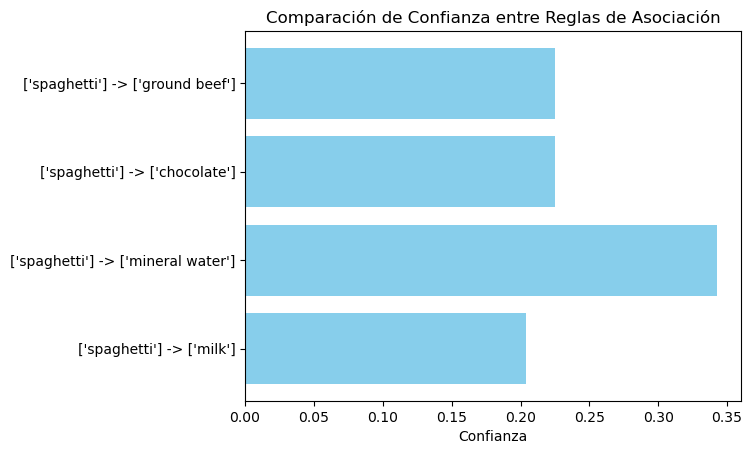

In [27]:
reglas_umbral['etiqueta'] = reglas_umbral.apply(lambda row: f"{list(row['antecedents'])} -> {list(row['consequents'])}", axis=1)

plt.barh(reglas_umbral['etiqueta'], reglas_umbral['confidence'], color='skyblue')
plt.xlabel('Confianza')
plt.title('Comparación de Confianza entre Reglas de Asociación')
plt.show()

Observando el gráfico, podemos concluir que con una confianza de 0.35 spaghetti -> mineral water, es decir, si compras spaghetti entonces, con una confianza del 35% aproximadamente, comprarás mineral water.

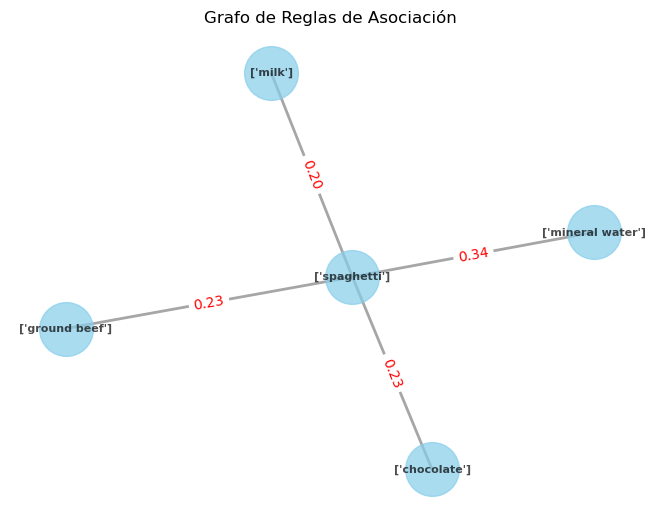

In [28]:
G = nx.Graph()

# Agregar nodos y conexiones al grafo
for idx, row in reglas_umbral.iterrows():
    antecedents_list = list(row['antecedents'])
    consequents_list = list(row['consequents'])

    G.add_node(str(antecedents_list))
    G.add_node(str(consequents_list))
    G.add_edge(str(antecedents_list), str(consequents_list), weight=round(row['confidence'], 2))

# Dibujar el grafo
pos = nx.spring_layout(G)  # Puedes ajustar el layout según tus preferencias
nx.draw(G, pos, with_labels=True, font_size=8, node_size=1500, font_color='black', node_color='skyblue', edge_color='gray', width=2, alpha=0.7, font_weight='bold', edge_cmap=plt.cm.Blues)
labels = nx.get_edge_attributes(G, 'weight')
labels_formatted = {edge: f"{weight:.2f}" for edge, weight in labels.items()}  # Formatear el peso
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels_formatted, font_color='red')

plt.title('Grafo de Reglas de Asociación')
plt.show()

En este gáfico se puede estudiar más de lo mismo pero igual de una manera más visual, y por ello se puede sacar mejores conclusiones de negocio como por ejemplo una oferta de espaguetis a aquellos que compren carne o agua. Esto aumentaría la venta de espaguetis para la gente que compra carne.


### PRÁCTICA 2 (PATRONES SECUENCIALES)

Importamos las librerías necesarias y cargamos el archivo


In [29]:
from posixpath import sep
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from gsppy.gsp import GSP
import pandas as pd
from collections import defaultdict

url="https://raw.githubusercontent.com/Juanitorivi/LAB02/main/Online_Retail.xlsx"
# Read the Excel file from the URL
data = pd.read_excel(url)
data.head(10)


InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom  
4 2010-12-01 08:26:00       3.39       17850  United Kingdom  
5 2010-12-01 08:26:00       7.65       17850  United Kingdom  
6 2010-12-01 08:26:00       4.25       17850  United Kingdom  
7 2010-12-01 08:28:00       1.85       17850  United Kingdom  
8 2010-12-01 08:28:00       1.85       17850  United Kingdom  
9 2010-12-01 08:34:00       1.69       13047  United Kingdom

Creamos una copia del DataFrame para poder modificarlo sin afectar al original

In [30]:
ds = data.copy()
id(data), id(ds)

(2720430444240, 2720429684752)

### SOLUCIÓN

#### Limpieza y preprocesamiento de los datos

**'data'**  contiene una base de datos de compras online de varios clientes a lo largo del tiempo. Para cada producto comprado por un cliente en una fecha se lleva un registro de las siguientes variables:

In [31]:
data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


- InvoiceNo: Número de factura que identifica de forma única cada transacción de compra.



- StockCode: Código único que identifica un producto específico en el inventario de la tienda en línea.



- Description: Proporciona información adicional sobre el producto con el código de stock, como su nombre o características.



- Quantity: Indica la cantidad de unidades del producto que se compraron en la transacción correspondiente.



- InvoiceDate: Timestamp que indica la fecha y hora en que se realizó la transacción de compra.



- UnitPrice: Precio unitario del producto en la moneda local en la que se realizó la transacción.



- CustomerID: Identificador único del cliente que realizó la compra.



- Country: País donde se realizó la transacción. 

Los países que compran de la tienda son los siguientes:

In [32]:
import numpy as np
np.sort(data['Country'].unique())

array(['Australia', 'Austria', 'Bahrain', 'Belgium', 'Brazil', 'Canada',
       'Channel Islands', 'Cyprus', 'Czech Republic', 'Denmark', 'EIRE',
       'European Community', 'Finland', 'France', 'Germany', 'Greece',
       'Hong Kong', 'Iceland', 'Israel', 'Italy', 'Japan', 'Lebanon',
       'Lithuania', 'Malta', 'Netherlands', 'Norway', 'Poland',
       'Portugal', 'RSA', 'Saudi Arabia', 'Singapore', 'Spain', 'Sweden',
       'Switzerland', 'USA', 'United Arab Emirates', 'United Kingdom',
       'Unspecified'], dtype=object)

Como no tendremos en cuenta el país en el estudio de los patrones secuenciales, a pesar de haber una categoría no especificada no haremos ninguna modificación

Número de clientes:

In [33]:
data['CustomerID'].unique().size

4372

Número de productos distintos:

In [34]:
data['StockCode'].unique().size

4070

Número de facturas de compra distintas:

In [35]:
data['InvoiceNo'].unique().size

25900

Número de días en los que se hicieron transacciones:

In [36]:
data['InvoiceDate'].unique().size

23260

La factura esta compuesta de múltiples productos, por lo que se repite en tantos registros como productos tenga

In [37]:
data['InvoiceNo'].value_counts()

InvoiceNo
573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: count, Length: 25900, dtype: int64

Lo mismo pasa con los códigos de los productos.

In [38]:
data['StockCode'].value_counts()

StockCode
85123A    2313
22423     2203
85099B    2159
47566     1727
20725     1639
          ... 
21431        1
22275        1
17001        1
90187A       1
72759        1
Name: count, Length: 4070, dtype: int64

Por otra parte un mismo producto asociado a un código puede tener distintos precios por unidad

In [39]:
data.groupby('StockCode')['UnitPrice'].unique()

StockCode
10002                                   [0.85, 1.66, 1.63, 0.0]
10080                                         [0.85, 0.39, 0.0]
10120                                                    [0.21]
10125                      [0.85, 1.66, 0.42, 0.81, 0.79, 1.63]
10133           [0.85, 1.66, 0.42, 0.81, 0.79, 1.63, 0.83, 0.0]
                                     ...                       
gift_0001_20                                [17.02, 16.67, 0.0]
gift_0001_30                                 [25.53, 25.0, 0.0]
gift_0001_40                                     [34.04, 33.33]
gift_0001_50                                     [42.55, 41.67]
m                                                        [2.55]
Name: UnitPrice, Length: 4070, dtype: object

Lo mismo para con las descripciones

In [40]:
data.groupby('StockCode')['Description'].unique()

StockCode
10002                          [INFLATABLE POLITICAL GLOBE , nan]
10080                      [GROOVY CACTUS INFLATABLE, nan, check]
10120                                              [DOGGY RUBBER]
10125                                   [MINI FUNKY DESIGN TAPES]
10133                     [COLOURING PENCILS BROWN TUBE, damaged]
                                      ...                        
gift_0001_20    [Dotcomgiftshop Gift Voucher £20.00, to push o...
gift_0001_30            [Dotcomgiftshop Gift Voucher £30.00, nan]
gift_0001_40                 [Dotcomgiftshop Gift Voucher £40.00]
gift_0001_50                 [Dotcomgiftshop Gift Voucher £50.00]
m                                                        [Manual]
Name: Description, Length: 4070, dtype: object

#### ESTUDIO DE NANS

In [41]:
data.isna().sum()

InvoiceNo         0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID        0
Country           0
dtype: int64

In [42]:
nan_D = data[data['Description'].isna()]
nan_D.head(20)

InvoiceNo StockCode Description  Quantity         InvoiceDate  UnitPrice  \
622     536414     22139         NaN        56 2010-12-01 11:52:00        0.0   
1970    536545     21134         NaN         1 2010-12-01 14:32:00        0.0   
1971    536546     22145         NaN         1 2010-12-01 14:33:00        0.0   
1972    536547     37509         NaN         1 2010-12-01 14:33:00        0.0   
1987    536549    85226A         NaN         1 2010-12-01 14:34:00        0.0   
1988    536550     85044         NaN         1 2010-12-01 14:34:00        0.0   
2024    536552     20950         NaN         1 2010-12-01 14:34:00        0.0   
2025    536553     37461         NaN         3 2010-12-01 14:35:00        0.0   
2026    536554     84670         NaN        23 2010-12-01 14:35:00        0.0   
2406    536589     21777         NaN       -10 2010-12-01 16:50:00        0.0   
4347    536764    84952C         NaN       -38 2010-12-02 14:42:00        0.0   
4348    536765    84952C         NaN        19 2010-12-02 14:43:00        0.0   
7187    536995     35951         NaN        57 2010-12-03 15:29:00        0.0   
7188    536996     22712         NaN       -20 2010-12-03 15:30:00        0.0   
7189    536997     22028         NaN       -20 2010-12-03 15:30:00        0.0   
7190    536998     85067         NaN        -6 2010-12-03 15:30:00        0.0   
7191    536999     21421         NaN       110 2010-12-03 15:32:00        0.0   
7192    537000     21414         NaN       -22 2010-12-03 15:32:00        0.0   
7193    537001     21653         NaN        -6 2010-12-03 15:33:00        0.0   
7194    537002     21651         NaN        70 2010-12-03 15:33:00        0.0   

      CustomerID         Country  
622        15287  United Kingdom  
1970       15287  United Kingdom  
1971       15287  United Kingdom  
1972       15287  United Kingdom  
1987       15287  United Kingdom  
1988       15287  United Kingdom  
2024       15287  United Kingdom  
2025       15287  United Kingdom  
2026       15287  United Kingdom  
2406       15287  United Kingdom  
4347       15287  United Kingdom  
4348       15287  United Kingdom  
7187       15287  United Kingdom  
7188       15287  United Kingdom  
7189       15287  United Kingdom  
7190       15287  United Kingdom  
7191       15287  United Kingdom  
7192       15287  United Kingdom  
7193       15287  United Kingdom  
7194       15287  United Kingdom

Podemos ver que se encuentran muchos de ellos cuando el precio es 0 por lo tanto no ha comprado nada, o conocen a gente y se lo dan gratis; al ser algo no común los vamos a quitar de la base de datos

In [43]:
cero_price = data[data['UnitPrice'] == 0]
cero_price.head(10)

InvoiceNo StockCode Description  Quantity         InvoiceDate  UnitPrice  \
622     536414     22139         NaN        56 2010-12-01 11:52:00        0.0   
1970    536545     21134         NaN         1 2010-12-01 14:32:00        0.0   
1971    536546     22145         NaN         1 2010-12-01 14:33:00        0.0   
1972    536547     37509         NaN         1 2010-12-01 14:33:00        0.0   
1987    536549    85226A         NaN         1 2010-12-01 14:34:00        0.0   
1988    536550     85044         NaN         1 2010-12-01 14:34:00        0.0   
2024    536552     20950         NaN         1 2010-12-01 14:34:00        0.0   
2025    536553     37461         NaN         3 2010-12-01 14:35:00        0.0   
2026    536554     84670         NaN        23 2010-12-01 14:35:00        0.0   
2406    536589     21777         NaN       -10 2010-12-01 16:50:00        0.0   

      CustomerID         Country  
622        15287  United Kingdom  
1970       15287  United Kingdom  
1971       15287  United Kingdom  
1972       15287  United Kingdom  
1987       15287  United Kingdom  
1988       15287  United Kingdom  
2024       15287  United Kingdom  
2025       15287  United Kingdom  
2026       15287  United Kingdom  
2406       15287  United Kingdom

In [44]:
data = data.drop(data[data['UnitPrice'] == 0].index)

In [45]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Podemos ver que la base de datos ya no tiene nans, pero por otro lado vamos a ver si tiene más valores no comunes en las compras, como cantidades negativas de productos, es decir, devoluciones.

In [46]:
##limpieza base de datos
negative = data[data['Quantity'] < 0]
negative.head(5)

InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice  CustomerID         Country  
141 2010-12-01 09:41:00      27.50       14527  United Kingdom  
154 2010-12-01 09:49:00       4.65       15311  United Kingdom  
235 2010-12-01 10:24:00       1.65       17548  United Kingdom  
236 2010-12-01 10:24:00       0.29       17548  United Kingdom  
237 2010-12-01 10:24:00       0.29       17548  United Kingdom

In [47]:
data = data.drop(data[data['Quantity'] < 0].index)
if data[data['Quantity'] < 0].shape[0] == 0:
  print('Los registros con cantidades de producto negativas fueron eliminados')

Los registros con cantidades de producto negativas fueron eliminados


In [48]:
data['UnitPrice'] = pd.to_numeric(data['UnitPrice'], errors='coerce')

In [49]:
data[data['UnitPrice'] < 0]

InvoiceNo StockCode      Description  Quantity         InvoiceDate  \
299983   A563186         B  Adjust bad debt         1 2011-08-12 14:51:00   
299984   A563187         B  Adjust bad debt         1 2011-08-12 14:52:00   

        UnitPrice  CustomerID         Country  
299983  -11062.06       15287  United Kingdom  
299984  -11062.06       15287  United Kingdom

Lo quitamos, son errores de cobro

In [50]:
data = data.drop(data[data['UnitPrice'] < 0].index)

In [51]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

A continuación, ordenaremos las filas de datos por el ID del cliente y por la fecha de la factura, guardándolo en un DataFrame diferente. Con esto lo que hacemos es ordenarlo por secuencias.

In [52]:
# Ordenar las transacciones por CustomerID y luego por InvoiceDate
datos_ordenados = data.sort_values(by=['CustomerID', 'InvoiceDate'])

#### CREACIÓN DE TRANSACCIONES

Con el nuevo DataFrame ya ordenado creamos un diccionario que contenga las transacciones de cada uno de los clientes en una lista. Siendo la clave el ID del cliente y su valor la lista de todas las transacciones que ha realizado el cliente.

In [53]:
# Crear una lista de transacciones para cada cliente
transaccion_cliente = {}

# Iterar sobre cada grupo de transacciones por cliente
for customer_id, group in datos_ordenados.groupby('CustomerID'):

    # Obtener una lista de transacciones ordenadas por fecha para este cliente
    transacciones = group[['Description', 'InvoiceDate']].values.tolist()

    # Agregar la lista de transaciones como una secuencia para este cliente en el diccionario
    transaccion_cliente[customer_id] = transacciones

Vamos a imprimir las transacciones de cada cliente para asegurarnos que las transacciones son correctas y podemos ver si el orden cronológico es el correcto

In [54]:
# Imprimir un ejemplo de transacciones para cada cliente
for customer_id, transacciones in transaccion_cliente.items():
    print(f"Transacciones del cliente {customer_id}:")

    # Contador para rastrear el número de transacciones impresas
    contador_transacciones = 0

    for i, transaccion in enumerate(transacciones):
        # Imprimir solo las primeras 1000 transacciones debido al espacio
        if contador_transacciones < 1000:
            print(transaccion)
            contador_transacciones += 1
        else:
            break

    print("----")

Transacciones del cliente 12346:
['MEDIUM CERAMIC TOP STORAGE JAR', Timestamp('2011-01-18 10:01:00')]
----
Transacciones del cliente 12347:
['BLACK CANDELABRA T-LIGHT HOLDER', Timestamp('2010-12-07 14:57:00')]
['AIRLINE BAG VINTAGE JET SET BROWN', Timestamp('2010-12-07 14:57:00')]
['COLOUR GLASS. STAR T-LIGHT HOLDER', Timestamp('2010-12-07 14:57:00')]
['MINI PAINT SET VINTAGE ', Timestamp('2010-12-07 14:57:00')]
['CLEAR DRAWER KNOB ACRYLIC EDWARDIAN', Timestamp('2010-12-07 14:57:00')]
['PINK DRAWER KNOB ACRYLIC EDWARDIAN', Timestamp('2010-12-07 14:57:00')]
['GREEN DRAWER KNOB ACRYLIC EDWARDIAN', Timestamp('2010-12-07 14:57:00')]
['RED DRAWER KNOB ACRYLIC EDWARDIAN', Timestamp('2010-12-07 14:57:00')]
['PURPLE DRAWERKNOB ACRYLIC EDWARDIAN', Timestamp('2010-12-07 14:57:00')]
['BLUE DRAWER KNOB ACRYLIC EDWARDIAN', Timestamp('2010-12-07 14:57:00')]
['ALARM CLOCK BAKELIKE CHOCOLATE', Timestamp('2010-12-07 14:57:00')]
['ALARM CLOCK BAKELIKE GREEN', Timestamp('2010-12-07 14:57:00')]
['ALARM CL

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



["PAPER CHAIN KIT 50'S CHRISTMAS ", Timestamp('2011-11-16 15:14:00')]
['EGG CUP HENRIETTA HEN PINK', Timestamp('2011-11-16 15:14:00')]
['BLUE DINER WALL CLOCK', Timestamp('2011-11-16 15:14:00')]
['PINK DINER WALL CLOCK', Timestamp('2011-11-16 15:14:00')]
['MINT DINER WALL CLOCK', Timestamp('2011-11-16 15:14:00')]
['DECORATION  PINK CHICK MAGIC GARDEN', Timestamp('2011-11-16 15:14:00')]
['ALARM CLOCK BAKELIKE GREEN', Timestamp('2011-11-16 15:14:00')]
['ALARM CLOCK BAKELIKE PINK', Timestamp('2011-11-16 15:14:00')]
['ANTIQUE GLASS DRESSING TABLE POT', Timestamp('2011-11-16 15:14:00')]
['CARD BILLBOARD FONT', Timestamp('2011-11-16 15:14:00')]
['EGG CUP HENRIETTA HEN CREAM ', Timestamp('2011-11-16 15:14:00')]
['60 CAKE CASES VINTAGE CHRISTMAS', Timestamp('2011-11-16 15:14:00')]
['SET OF 3 HANGING OWLS OLLIE BEAK', Timestamp('2011-11-16 15:14:00')]
['SET OF 3 WOODEN HEART DECORATIONS', Timestamp('2011-11-16 15:14:00')]
['SET OF 3 HANGING OWLS OLLIE BEAK', Timestamp('2011-11-28 09:08:00')]
['

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['SMALL GLASS HEART TRINKET POT', Timestamp('2011-04-17 11:44:00')]
['GLITTER BUTTERFLY CLIPS', Timestamp('2011-04-17 11:44:00')]
['LOVEBIRD HANGING DECORATION WHITE ', Timestamp('2011-04-17 11:44:00')]
----
Transacciones del cliente 17991:
['GREEN REGENCY TEACUP AND SAUCER', Timestamp('2011-04-27 16:39:00')]
['PINK REGENCY TEACUP AND SAUCER', Timestamp('2011-04-27 16:39:00')]
['PAPER CHAIN KIT EMPIRE', Timestamp('2011-04-28 15:58:00')]
['PINK REGENCY TEACUP AND SAUCER', Timestamp('2011-04-28 15:58:00')]
['REGENCY CAKESTAND 3 TIER', Timestamp('2011-04-28 15:58:00')]
----
Transacciones del cliente 17994:
['4 IVORY DINNER CANDLES SILVER FLOCK', Timestamp('2011-02-22 11:02:00')]
['PACK 3 FIRE ENGINE/CAR PATCHES', Timestamp('2011-02-22 11:02:00')]
['PLASTERS IN TIN CIRCUS PARADE ', Timestamp('2011-02-22 11:02:00')]
['PLASTERS IN TIN VINTAGE PAISLEY ', Timestamp('2011-02-22 11:02:00')]
['PLASTERS IN TIN WOODLAND ANIMALS', Timestamp('2011-02-22 11:02:00')]
['PLASTERS IN TIN STRONGMAN', Times

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Debido a la multitud de datos, hemos optado por trabajar únicamente con un porcentaje de ellos, debido a la capacidad de memoria que no sería suficiente sino.

In [55]:
datos_2000 = data.head(2000)
# Ordenar las transacciones por CustomerID y luego por InvoiceDate
datos_reducido = datos_2000.sort_values(by=['CustomerID', 'InvoiceDate'])
# Creamos una lista de transacciones para cada cliente
transaccion_cliente = {}

# Iteramos sobre cada grupo de transacciones por cliente
for customer_id, group in datos_reducido.groupby('CustomerID'):

    # Obtenemos una lista de transacciones ordenadas por fecha para este cliente
    transacciones = group[['StockCode', 'Description', 'InvoiceDate']].values.tolist()

    # Agregamos la lista de transaciones como una secuencia para este cliente en el diccionario
    transaccion_cliente[customer_id] = transacciones

Para poder aplicar el algoritmo GSP debemos cambiar el formato de las transacciones. Este formato debe ser una lista de secuencias y el algoritmo encuentra patrones que sean frecuentes.



In [56]:
# Convertimos las transacciones a un formato adecuado para GSP
sequences = []
for transacciones in transaccion_cliente.values():
    sequence = [transaccion[0] for transaccion in transacciones]
    sequences.append(sequence)

#### APLICAR GSP

Para encontrar patrones secuenciales frecuentes aplicamos el GSP. 

Los resultados aparecerán en forma de lista de diccionarios cuyo diccionario representa un conjunto de patrones de secuencias de una determinada longitud.

Las claves serán los patrones encontrados mientras que los valores serán el soporte mínimo de cada patrón.

In [57]:
# Configuramos y ejecutamos GSP
gsp = GSP(sequences)
resultado_gsp = gsp.search(minsup=0.1)

# Verificamos la estructura del resultado
print(resultado_gsp)

# Se está configurando y ejecutando el algoritmo GSP.

[{(22632,): 11, (22865,): 9, (22114,): 7, (22866,): 10, (22961,): 12, (21212,): 8, (21977,): 7, (22197,): 8, (22900,): 8, (22837,): 8, (22969,): 8, (22867,): 8, (22910,): 9, (22469,): 7, (22086,): 9, (21485,): 7, (22111,): 7, (84879,): 8, (22960,): 8, (22633,): 7, ('85123A',): 8, ('85099B',): 8, (22411,): 7, (22423,): 8}]


### K=1

Creamos dos configuraciones diferentes con soportes distintos, esto nos permitirá ver como al aumentar el soporte, los patrones disminuyen.

- Soporte mínimo: 0.1

- Soporte mínimo: 0.15

In [59]:
# Configuración 1: Soporte mínimo del 10%
sopmin_01 = 0.1
gsp1 = GSP(sequences)
patron1 = gsp1.search(sopmin_01)

# Configuración 2: Soporte mínimo del 15%
sopmin_015 = 0.15
gsp2 = GSP(sequences)
patron2 = gsp2.search(minsup=sopmin_015)

# Imprimimos los resultados para la configuración 1
print(f"Resultados con soporte mínimo del 10%:")
for patron_dict in patron1:
    for patron, soporte in patron_dict.items():
        print(f"Patrón: {patron}, Soporte: {soporte}")

# Imprimimos los resultados para la configuración 2
print(f"\nResultados con soporte mínimo del 15%:")
for patron_dict in patron2:
    for patron, soporte in patron_dict.items():
        print(f"Patrón: {patron}, Soporte: {soporte}")

Resultados con soporte mínimo del 10%:
Patrón: (22865,), Soporte: 9
Patrón: (22632,), Soporte: 11
Patrón: (22866,), Soporte: 10
Patrón: (22114,), Soporte: 7
Patrón: (22961,), Soporte: 12
Patrón: (21977,), Soporte: 7
Patrón: (21212,), Soporte: 8
Patrón: (22197,), Soporte: 8
Patrón: (22900,), Soporte: 8
Patrón: (22837,), Soporte: 8
Patrón: (22969,), Soporte: 8
Patrón: (22867,), Soporte: 8
Patrón: (22910,), Soporte: 9
Patrón: (22469,), Soporte: 7
Patrón: (22086,), Soporte: 9
Patrón: (21485,), Soporte: 7
Patrón: (22111,), Soporte: 7
Patrón: (84879,), Soporte: 8
Patrón: (22960,), Soporte: 8
Patrón: (22633,), Soporte: 7
Patrón: ('85123A',), Soporte: 8
Patrón: ('85099B',), Soporte: 8
Patrón: (22411,), Soporte: 7
Patrón: (22423,), Soporte: 8

Resultados con soporte mínimo del 15%:
Patrón: (22632,), Soporte: 11
Patrón: (22961,), Soporte: 12


### K=2

Buscamos las combinaciones de 2 que tengan un soporte igual o mayor al que le indiquemos, que será como en el procedimiento anterior.

Resultan aquellas combinaciones que pasaron el procedimiento de k=1 y ahora el k=2.

In [60]:
from itertools import combinations

def find_frequent_sequences_k2(transacciones, minsup):

    # Contamos la frecuencia de cada par de elementos en las transacciones
    contador_parejas = {}
    for transaccion in transacciones:
        # Generamos todas las combinaciones de longitud 2
        grupo_parejas = combinations(transaccion, 2)  
        for pareja in grupo_parejas:
            if pareja in contador_parejas:
                contador_parejas[pareja] += 1
            else:
                contador_parejas[pareja] = 1

    # Filtramos los pares que cumplen con el umbral de soporte mínimo
    numero_transacciones = len(transacciones)
    frequent_grupo_parejas = {pareja: count / numero_transacciones for pareja, count in contador_parejas.items() if count / numero_transacciones >= minsup}

    return frequent_grupo_parejas

# Configuración 1: Soporte mínimo del 10%
sopmin1 = 0.1
frequent_grupo_parejas_1 = find_frequent_sequences_k2(sequences, sopmin_01)

# Configuración 2: Soporte mínimo del 15%
sopmin_015 = 0.15
frequent_grupo_parejas_2 = find_frequent_sequences_k2(sequences, sopmin_015)

# Imprimimos los resultados para la configuración 1
print(f"Resultados con soporte mínimo del 10%:")
for pareja, soporte in frequent_grupo_parejas_1.items():
    print(f"Patrón: {pareja}, Soporte: {soporte}")

# Imprimimos los resultados para la configuración 2
print(f"\nResultados con soporte mínimo del 15%:")
for pareja, soporte in frequent_grupo_parejas_2.items():
    print(f"Patrón: {pareja}, Soporte: {soporte}")

Resultados con soporte mínimo del 10%:
Patrón: (22866, 21212), Soporte: 0.12857142857142856
Patrón: (22866, 22197), Soporte: 0.1
Patrón: (22633, 22632), Soporte: 0.18571428571428572
Patrón: (22633, '85123A'), Soporte: 0.18571428571428572
Patrón: (22632, '85123A'), Soporte: 0.2
Patrón: (22752, 22632), Soporte: 0.21428571428571427
Patrón: (21977, 22866), Soporte: 0.1
Patrón: (22632, 22633), Soporte: 0.22857142857142856
Patrón: (22749, 22569), Soporte: 0.1
Patrón: (22866, '85231G'), Soporte: 0.1
Patrón: (22866, 21121), Soporte: 0.1
Patrón: (22866, '85231B'), Soporte: 0.11428571428571428
Patrón: (22632, 37370), Soporte: 0.18571428571428572
Patrón: (22632, 22632), Soporte: 0.15714285714285714
Patrón: (37370, 22632), Soporte: 0.14285714285714285
Patrón: (82486, 22632), Soporte: 0.14285714285714285
Patrón: (21871, 22632), Soporte: 0.14285714285714285
Patrón: (21871, 37370), Soporte: 0.1
Patrón: (21871, 71053), Soporte: 0.1
Patrón: (21871, '84029E'), Soporte: 0.15714285714285714
Patrón: (21871

### K=3

Se realiza el mismo proceso que el anterior, pero con la única diferencia de quue se buscan combinaciones de 3 elementos.

In [61]:
from itertools import combinations

def find_frequent_sequences_k3(transacciones, minsup):
    # Contar la frecuencia de cada trio de elementos en las transacciones
    contador_trios = {}
    for transaccion in transacciones:
        # Generar todas las combinaciones de longitud 3
        grupos_trios = combinations(transaccion, 3)  
        for trios in grupos_trios:
            if trios in contador_trios:
                contador_trios[trios] += 1
            else:
                contador_trios[trios] = 1

    # Filtrar las grupos_trios que cumplen con el umbral de soporte mínimo
    numero_transacciones = len(transacciones)
    frequent_grupos_trios = {trios: count / numero_transacciones for trios, count in contador_trios.items() if count / numero_transacciones >= minsup}

    return frequent_grupos_trios

# Configuración 1: Soporte mínimo del 10%
sopmin_01 = 0.1
frequent_grupos_trios_1 = find_frequent_sequences_k3(sequences, sopmin_01)

# Configuración 2: Soporte mínimo del 15%
sopmin_015 = 0.15
frequent_grupos_trios_2 = find_frequent_sequences_k3(sequences, sopmin_015)

# Imprimir los resultados para la configuración 1
print(f"Resultados con soporte mínimo del 10%:")
for trios, soporte in frequent_grupos_trios_1.items():
    print(f"Patrón: {trios}, Soporte: {soporte}")

# Imprimir los resultados para la configuración 2
print(f"\nResultados con soporte mínimo del 15%:")
for trios, soporte in frequent_grupos_trios_2.items():
    print(f"Patrón: {trios}, Soporte: {soporte}")

Resultados con soporte mínimo del 10%:
Patrón: (22866, 22956, 21212), Soporte: 0.11428571428571428
Patrón: (22866, 21212, 22197), Soporte: 0.1
Patrón: (22633, 22632, '85123A'), Soporte: 0.22857142857142856
Patrón: (22632, 22633, '85123A'), Soporte: 0.2714285714285714
Patrón: (22866, '85231G', '85231B'), Soporte: 0.1
Patrón: (22866, 21121, '85231B'), Soporte: 0.1
Patrón: (22866, 21121, 21122), Soporte: 0.1
Patrón: (22632, 37370, 22632), Soporte: 0.32857142857142857
Patrón: (21871, 22632, 37370), Soporte: 0.11428571428571428
Patrón: (21871, 22632, 71053), Soporte: 0.11428571428571428
Patrón: (21871, 22632, '84029E'), Soporte: 0.11428571428571428
Patrón: (21871, 22632, '84029G'), Soporte: 0.11428571428571428
Patrón: (21871, 22632, '85123A'), Soporte: 0.11428571428571428
Patrón: (21871, 22632, 22633), Soporte: 0.24285714285714285
Patrón: (21871, 22632, 21068), Soporte: 0.11428571428571428
Patrón: (21871, 22632, 21071), Soporte: 0.11428571428571428
Patrón: (21871, 37370, '84029E'), Soporte:

### K=4

Ahora buscaremos combinaciones de 4 elementos.

In [ ]:
def find_frequent_sequences_k4(transacciones, minsup):
    # Contamos la frecuencia de cada cuarteto de elementos en las transacciones
    contador_cuartetos = {}
    for transaccion in transacciones:
        grupos_cuartetos = combinations(transaccion, 4)  # Generamos todas las combinaciones de longitud 4
        for cuartetos in grupos_cuartetos:
            if cuartetos in contador_cuartetos:
                contador_cuartetos[cuartetos] += 1
            else:
                contador_cuartetos[cuartetos] = 1

    # Filtramos las grupos_cuartetos que cumplen con el umbral de soporte mínimo
    numero_transacciones = len(transacciones)
    frequent_grupos_cuartetos = {cuartetos: count / numero_transacciones for cuartetos, count in contador_cuartetos.items() if count / numero_transacciones >= minsup}

    return frequent_grupos_cuartetos

# Configuración 1: Soporte mínimo del 10%
sopmin_01 = 0.1
frequent_grupos_cuartetos_1 = find_frequent_sequences_k4(sequences, sopmin_01)

# Configuración 2: Soporte mínimo del 15%
sopmin_015 = 0.15
frequent_grupos_cuartetos_2 = find_frequent_sequences_k4(sequences, sopmin_015)

# Imprimimos los resultados para la configuración 1
print(f"Resultados con soporte mínimo del 10%:")
for cuartetos, soporte in frequent_grupos_cuartetos_1.items():
    print(f"Patrón: {cuartetos}, Soporte: {soporte}")

# Imprimimos los resultados para la configuración 2
print(f"\nResultados con soporte mínimo del 15%:")
for cuartetos, soporte in frequent_grupos_cuartetos_2.items():
    print(f"Patrón: {cuartetos}, Soporte: {soporte}")

No se generan más secuencias con k=4, por ello se acaba el problema.

#### CONCLUSIONES



La combinación más común depende del valor del soporte mínimo y de la longitud de la secuencia, en un GSP nos quedaremos con la secuencia con mayor longitud en este caso k=3. Vamos a analizar algunos de estos patrones:

Para el soporte mínimo= 0.1:

Las combinaciones con mayor soporte son de 0.5 y algunas de ellas son:

(71053, '84406B', '84029E'); ('84406B', '84029G', '84029E'), pero hay muchas más.

Para el soporte mínimo= 0.15:

Las combinaciones con mayor soporte son de 0.5 y algunas de ellas son:
('84029E', 22752, 21730);  (71053, '84029E', 22752); pero hay muchas más.

Podemos apreciar que a nivel que la longitud de las combinaciones aumentan, es decir, la k aumenta, los patrones van siendo menos y son más complejos incluyendo diferentes elementos en cada una.

Por otro lado, también se puede observar como con el aumento del soporte mínimo el número de patrones disminuye, debido a que filtra más elementos que no se repiten con tanta frecuencia en el dataset.

Como bien podemos ver en nuestros resultados, la cantidad de patrones  cuando el soporte es 0.15, disminuye respecto a cuando es 0.1.

Con todo esto, analizar los resultados del algoritmo Generalized Sequential Patterns (GSP), nos puede aportar información muy valiosa sobre los patrones de secuencias de datos, esto es bueno para  comprender a los usuarios (su mentalidad de compra, comportamiento, etc) y, además con ello, llegar a decidir diferentes ideas de negocio para el ámbito empresarial.